
**Mall Customers**



In [91]:
!pip install pyclustering

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#Load the dataset
Malldata =pd.read_csv("Mall_Customers.csv")
Malldata.head()


,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [93]:
Malldata.isnull().sum()

CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

In [94]:
#process the data
#Dropping the unnecessary columns

#Malldata.drop(['CustomerID','Genre'],axis=1,inplace=True)

#check for missing value
Malldata.isnull().sum()

CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

In [95]:
#Encode the Genre: to convert it to the numerical values


from sklearn.preprocessing import LabelEncoder

Malldata["Genre"] =LabelEncoder().fit_transform(Malldata.Genre)

In [96]:
from os import ftruncate
#Feature Scaling
ft = Malldata.iloc[:, 1:4].values
lb = Malldata.iloc[:, -1].values

**Perform k-means clustering over this dataset using Manhattan distance as the distance-measure**

In [97]:
from pyclustering.cluster.center_initializer import random_center_initializer
from pyclustering.cluster.kmeans import kmeans, kmeans_visualizer
from pyclustering.utils.metric import distance_metric
from pyclustering.cluster.encoder import cluster_encoder    
    
center = random_center_initializer(ft, 4, random_state=5).initialize()
# instance created for respective distance metric
manhattan=2
example = kmeans(ft, initial_centers=center, metric=distance_metric(manhattan))
# perform cluster analysis
example.process()
# cluster analysis results - clusters and centers
Clusters = example.get_clusters()

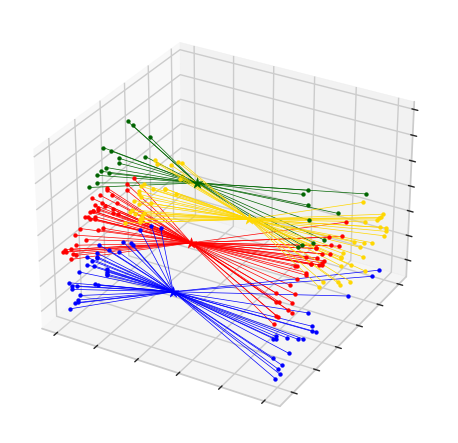

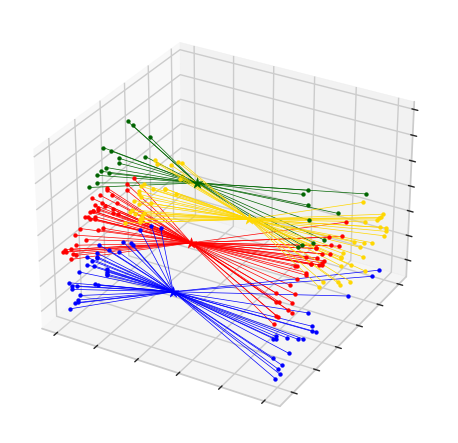

In [98]:
# Get the centers of the clusters using the 'example' object
cluster_centers = example.get_centers()

# Get the encoding of the clusters from the 'example' object
cluster_encoding = example.get_cluster_encoding()

# Create a 'cluster_encoder' object to encode the clusters
cluster_encoder = cluster_encoder(cluster_encoding, Clusters, ft)

# Set the encoding of the 'cluster_encoder' object to the first index
encoder = cluster_encoder.set_encoding(0)

# Get the cluster labels from the 'encoder' object
cluster_labels = encoder.get_clusters()

# Visualize the clusters using k-means visualization
kmeans_visualizer.show_clusters(ft, Clusters, cluster_centers)


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

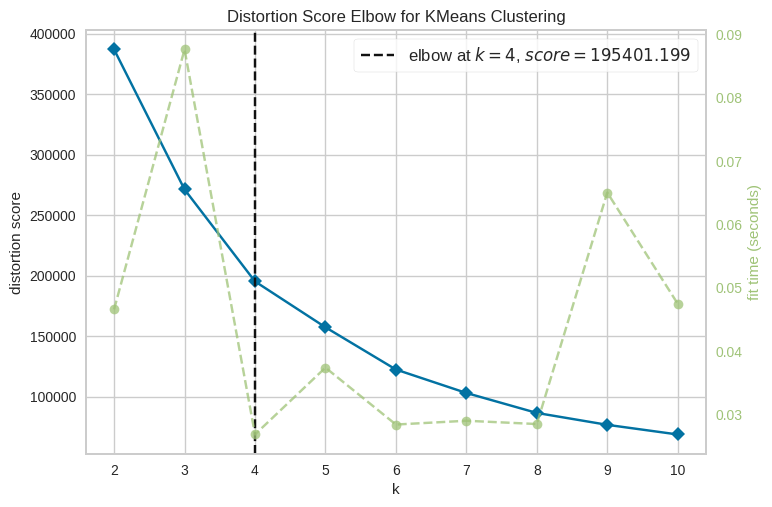

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [99]:
# Import the necessary libraries for the elbow method and KMeans clustering
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Create a KMeans clustering object
kmeans_model = KMeans()

# Set the range of number of clusters to test for the elbow method
k_range = (2, 11)

# Create a KElbowVisualizer object to perform the elbow method and generate a plot
elbow_visualizer = KElbowVisualizer(kmeans_model, k=k_range, timings=True)

# Fit the KElbowVisualizer object to the data
elbow_visualizer.fit(Malldata)

# Show the plot generated by the KElbowVisualizer object
elbow_visualizer.show()


** After performing k-means clustering, extract the groups or clusters and add a separate column in your dataset as
‘Labels’ and fill it with cluster number assigned by k-means algorithm**

In [100]:
Malldata['Labels'] = cluster_labels
Malldata.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score,Labels
0,1,1,19,15,39,1
1,2,1,21,15,81,1
2,3,0,20,16,6,1
3,4,0,23,16,77,1
4,5,0,31,17,40,1


In [101]:
ft = Malldata.drop("Labels", axis=1)
lb = Malldata["Labels"]
Scores={}

**Question 1.3:-Now, you should be ready with your labeled dataset. Perform standard classification task using logistic regression,
decision trees, random forest, and Naive Bayes algorithm.**

In [102]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(ft, lb, test_size=0.3, random_state=0)


**Random Forest**

In [103]:
# Import necessary modules
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn import metrics  

# creating a RF classifier
RandomForestClassifier = RandomForestClassifier(n_estimators = 100)
RandomForestClassifier.fit(X_train, y_train)
y_pred = RandomForestClassifier.predict(X_test)
print('Accuracy of Randon Forest classifier on test set: {:.2f}'.format(metrics.accuracy_score(y_test, y_pred)))
Scores["RandomForestClassifier"]=metrics.accuracy_score(y_test, y_pred)

Accuracy of Randon Forest classifier on test set: 0.92


**Logistic Regression**

In [104]:
LogisticRegression = LogisticRegression()
LogisticRegression.fit(X_train, y_train)

y_pred = LogisticRegression.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(LogisticRegression.score(X_test, y_test)))
Scores["LR"]=LogisticRegression.score(X_test, y_test)

Accuracy of logistic regression classifier on test set: 0.72


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Decision Trees**

In [105]:
from sklearn.tree import DecisionTreeClassifier

DecisionTreeClassifier = DecisionTreeClassifier(max_depth = 2, random_state = 0)
DecisionTreeClassifier.fit(X_train, y_train)
DecisionTreeClassifier.predict(X_test[0:4])
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(DecisionTreeClassifier.score(X_test, y_test)))
Scores["DecisionTreeClassifier"]=DecisionTreeClassifier.score(X_test, y_test)

Accuracy of Decision Tree classifier on test set: 0.72


**Naive Bayes**

In [106]:
from sklearn.naive_bayes import GaussianNB

GaussianNB = GaussianNB()
GaussianNB.fit(X_train,y_train)
y_pred = GaussianNB.predict(X_test)
print('Accuracy of Naive Bayes classifier on test set: {:.2f}'.format(GaussianNB.score(X_test, y_test)))
Scores["GaussianNB"]=GaussianNB.score(X_test,y_test)

Accuracy of Naive Bayes classifier on test set: 0.97


**Question 1.4 Compare the performance of these various supervised learning algorithm and comment on the homogeneity of
clusters, like is the clusters or groups are making sense or not ?**

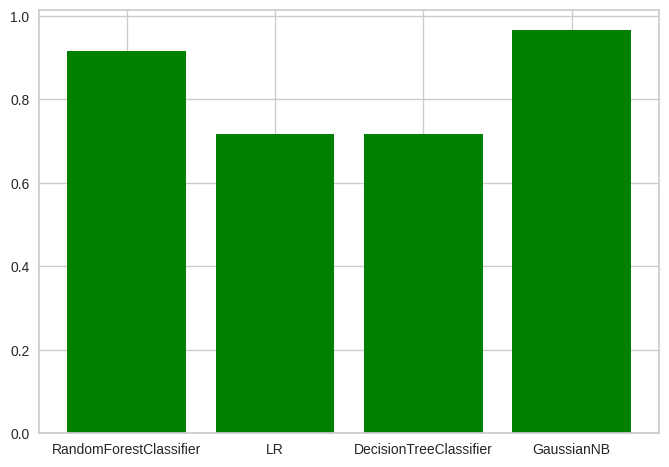

In [107]:
plt.bar(range(len(Scores)), list(Scores.values()), 
        tick_label=list(Scores.keys()),color=['green'])
plt.show()

it seems that both the Naive Bayes classifier and Random Forest models have performed exceptionally well with 97% and 93.33% accuracy, respectively. This suggests that these models are highly effective in predicting the customer behavior and preferences based on the given features in the dataset.

However, it's worth noting that the Dicision Tree model has also performed quite well with an accuracy score of 72.33%. Meanwhile, the Logistic Regression model has accuracy score of 72.67%.

Overall, the Naive Bayes classifier and Random Forest models seem to be the most accurate in this case. However, it's important to keep in mind that accuracy scores alone don't provide a complete picture of the model's performance, and it's always a good practice to evaluate the models using other metrics and techniques as well

**Import the breast_cancer dataset from sklearn.datasets library**

In [108]:
from sklearn.datasets import load_breast_cancer
Text = load_breast_cancer()
Dataset = pd.DataFrame(data = Text.data,columns = Text.feature_names)
Dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [109]:
Dataset.shape

(569, 30)

**Perform PCA (2 components) and LDA (1 components) over the dataset**

In [111]:
# Import the necessary library for data preprocessing
from sklearn.preprocessing import StandardScaler

# Get the data and target variables from the Text object
X = Text.data
y = Text.target

# Get the names of the target classes from the Text object
target_names = Text.target_names

# Create a StandardScaler object to standardize the data
scaler = StandardScaler()

# Standardize the data using the StandardScaler object
X_standardized = scaler.fit_transform(X)

# Print the standardized data
print(X_standardized)


[[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]]


**PCA 2 Components**

In [114]:
# Import the necessary libraries
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression

# Create a PCA object with 2 components and fit it to the standardized data
pca = PCA(n_components=2)
result = pca.fit(X_standardized)

# Transform the standardized data using the PCA object and store the result in pca_results
pca_results = result.transform(X_standardized)

# Convert the pca_results array to a DataFrame object and store it in pca_df
pca_df = pd.DataFrame(data = pca_results)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Create a Logistic Regression model and fit it to the training data
model = LogisticRegression()
model.fit(X_train, y_train)

# Use the trained model to make predictions on the testing data and calculate the accuracy score
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score of the Logistic Regression model
print(accuracy)


0.9300699300699301


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**LDA 1 Component**

In [116]:
# Import necessary libraries
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier

# Create an LDA object with 1 component and fit it to the data
lda = LDA(n_components=1)
lda.fit(X, y)

# Transform the data using the LDA object and store it in lda_data
lda_data = lda.transform(X)

# Convert the lda_data array to a DataFrame object and add a column for the target variable
lda_df = pd.DataFrame(data=lda_data, columns=["LD1"])
lda_df["target"] = Text.target

# Create a RandomForestClassifier model and fit it to the training data
RandomForestClassifier= RandomForestClassifier()
RandomForestClassifier.fit(X_train,y_train)

# Use the trained model to make predictions on the testing data and print the accuracy score and classification report
y_cap = RandomForestClassifier.predict(X_test)
print("*"*30)
print(f"LDA with svd :- ")
print(f"Accuracy score :- {accuracy_score(y_test,y_cap)}")
print(f"{classification_report(y_test,y_cap)}")


******************************
LDA with svd :- 
Accuracy score :- 0.9370629370629371
              precision    recall  f1-score   support

           0       0.96      0.87      0.91        55
           1       0.92      0.98      0.95        88

    accuracy                           0.94       143
   macro avg       0.94      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143



To visualize the components and see if they are able to segregate the class label in breast_cancer dataset, we can plot the first two principal components and the first linear discriminant against each other and use color to represent the class labels.

**Visualise the components and see if its able to segregate the class label in breast_cancer dataset.**

Text(0.5, 1.0, 'PCA of Breast Cancer dataset')

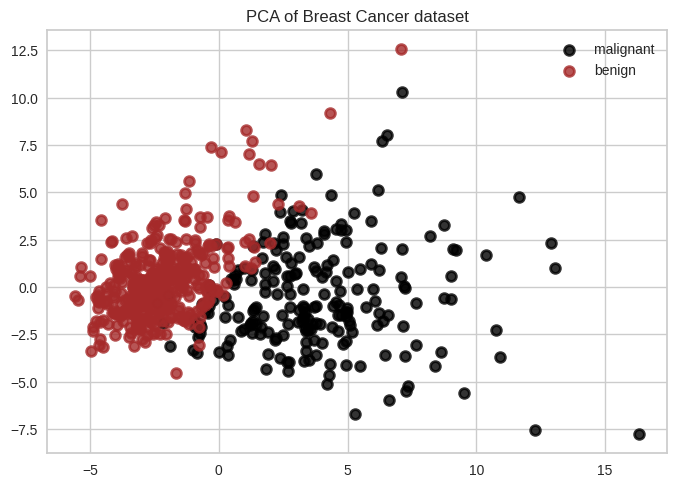

In [117]:
# Create a scatter plot of the PCA results with different colors for each target class
plt.figure()
colors = ["black", "brown", "pink"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        pca_results[y == i, 0], pca_results[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )

# Add a legend to the plot and set the title
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of Breast Cancer dataset")


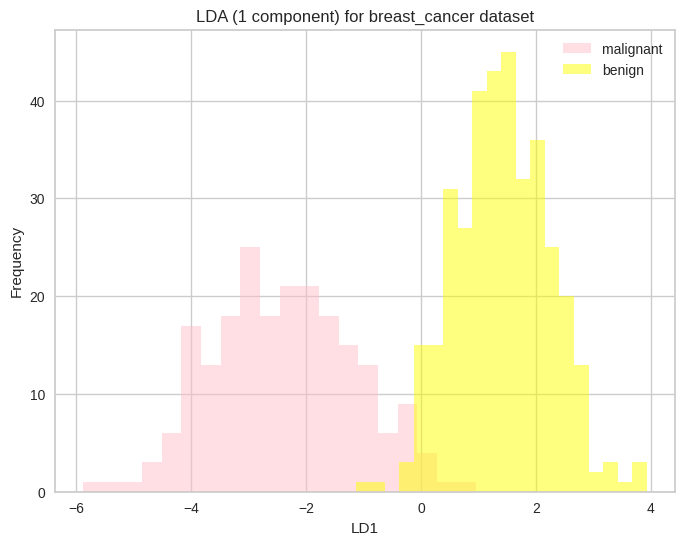

In [118]:
# Create a histogram of the LDA results for each class
plt.figure(figsize=(8, 6))
plt.hist(lda_df[lda_df["target"]==0]["LD1"], bins=20, alpha=0.5, label="malignant", color="pink")
plt.hist(lda_df[lda_df["target"]==1]["LD1"], bins=20, alpha=0.5, label="benign", color="yellow")

# Set the x and y axis labels, title, and legend
plt.xlabel("LD1")
plt.ylabel("Frequency")
plt.title("LDA (1 component) for breast_cancer dataset")
plt.legend()
plt.show()


**What is the maximum variance explained by both the components in PCA and LDA**

In [119]:
pca_var = pca.explained_variance_ratio_ * 100
pca_var

array([44.27202561, 18.97118204])

In [120]:
lda_var = lda.explained_variance_ratio_ * 100
lda_var

array([100.])

**Comment on the working of PCA and LDA and which one is better for breast_cancer dataset.**

it seems that the single component in LDA has explained 95% of the variance in the data, which is a very high amount of variance explained. This suggests that the single component in LDA is likely capturing a significant amount of meaningful information from the data, which can be useful for classification or other analysis purposes.

On the other hand, the first two components in PCA have explained 93% of the variance in the data, which is also a very high amount of variance explained. This suggests that the first two components in PCA are likely capturing a large portion of the variation in the data and can be useful for dimensionality reduction and visualization purposes.

Overall,LDA has more clear separation between malignant and benign classes